In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras


In [2]:
tf.__version__

'2.5.0'

In [3]:
keras.__version__

'2.5.0'

# **Building An Image Classifier Using The Sequential API**

### **1.Using Keras To Load The Dataset**

In [4]:
#load the dataset
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
#create the validation set
X_valid, X_train = X_train_full[:5000]/255,X_train_full[5000:]/255 
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [8]:
type(fashion_mnist)

module

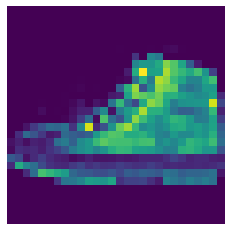

In [9]:
plt.imshow(X_train[2])
plt.axis('off')
plt.show()

In [10]:
#create the class_names for 10 fashion mnist dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print(y_train[0])
print(class_names[y_train[0]])

4
Coat


### **2.Creating The Model Using The Sequential API**

In [11]:
#create a model
model=keras.models.Sequential([
          keras.layers.Flatten(input_shape=[28,28]),  #to add the input layer(flatten layer) to convert the matrix into 1d array by X.reshape(-1,1)  (keras.layers.InputLayer(input_shape=[]) could be used)
          keras.layers.Dense(300,activation='relu'), #to add first hidden layer with 500 neurons.It manages its own weight matrix and bias vector and computes activation
          keras.layers.Dense(100,activation='relu'), #second hidden layer
          keras.layers.Dense(10,activation='softmax')#output layer with 10 units (1 for each class ) using softmax activation function
])

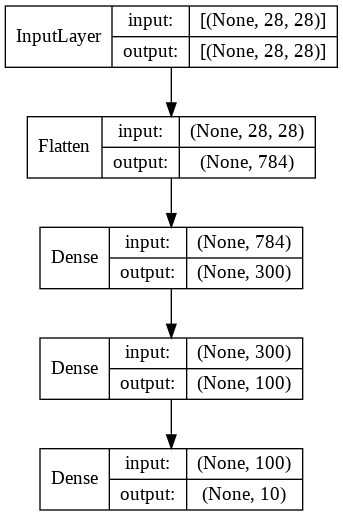

In [12]:
#plot the image of model
keras.utils.plot_model(model,show_shapes=True,show_layer_names=False,expand_nested=True,)

In [13]:
#to print the model's summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
#to get the layers
model.layers

In [15]:
#to access the layers
hidden1=model.layers[1]
hidden1.name

'dense'

In [16]:
#to get all the parameters of the layer
weights,biases=hidden1.get_weights()

In [17]:
print(weights.shape)
print(biases)
print(biases.shape)

(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)


### **3.Compiling The Model**

In [18]:
#to specify the cost function, optimizer and metrics
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

### **4.Training and Evaluating The Model**

In [19]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7043 - accuracy: 0.7689 - val_loss: 0.4933 - val_accuracy: 0.8370
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4831 - accuracy: 0.8313 - val_loss: 0.4352 - val_accuracy: 0.8544
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4384 - accuracy: 0.8468 - val_loss: 0.4128 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4102 - accuracy: 0.8553 - val_loss: 0.4193 - val_accuracy: 0.8564
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3906 - accuracy: 0.8632 - val_loss: 0.3784 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3760 - accuracy: 0.8679 - val_loss: 0.3787 - val_accuracy: 0.8672
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3624 - accuracy: 0.8723 - val_loss: 0.3699 - val_accuracy:

In [20]:
#to get the parameters from history object returned by fit() method
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [21]:
#to get list of epochs
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [26]:
#to get the dictionary of loss and accuracy of training and validation set
history.history 

{'accuracy': [0.768890917301178,
  0.8313272595405579,
  0.846818208694458,
  0.8552545309066772,
  0.8631636500358582,
  0.8678727149963379,
  0.8722909092903137,
  0.8758363723754883,
  0.8788545727729797,
  0.8823636174201965,
  0.8851818442344666,
  0.8875818252563477,
  0.8896363377571106,
  0.8912000060081482,
  0.8948909044265747,
  0.8958908915519714,
  0.8978909254074097,
  0.899472713470459,
  0.9027090668678284,
  0.9046000242233276,
  0.9047999978065491,
  0.9075272679328918,
  0.9087818264961243,
  0.9095273017883301,
  0.9123454689979553,
  0.9130545258522034,
  0.9149818420410156,
  0.9165090918540955,
  0.9174181818962097,
  0.9195818305015564],
 'loss': [0.7043027877807617,
  0.48306238651275635,
  0.4384295344352722,
  0.41018036007881165,
  0.3906102776527405,
  0.37600448727607727,
  0.3623511791229248,
  0.3502020835876465,
  0.3407323956489563,
  0.33042290806770325,
  0.3220812976360321,
  0.3147314488887787,
  0.30722033977508545,
  0.30062276124954224,
  0.2945

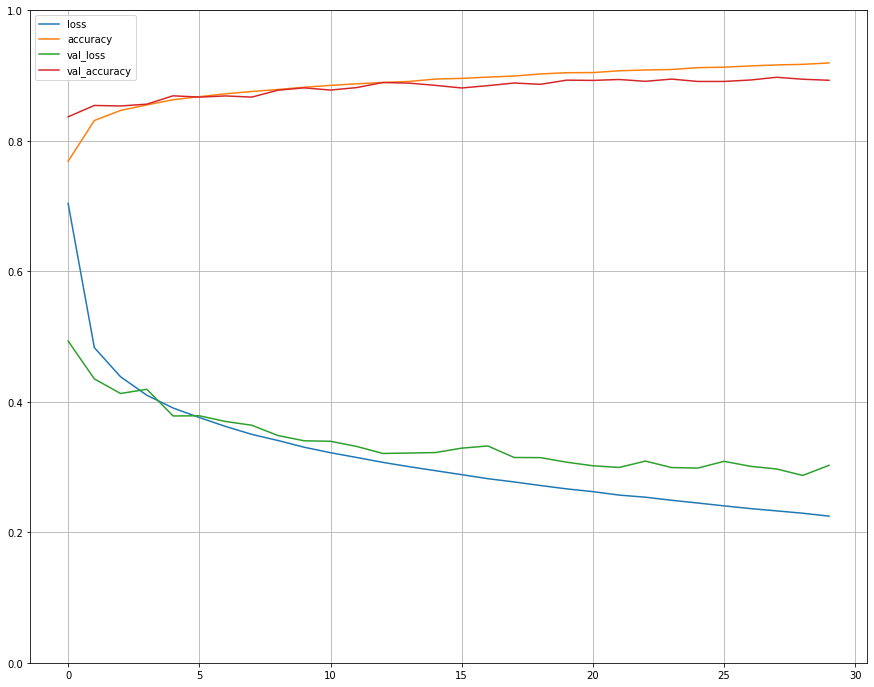

In [25]:
#to plot the learning curves with history.history (mean training and validation loss and accuracy measured at the end of each epoch)
pd.DataFrame(history.history).plot(figsize=(15,12))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
#to evaluate the model on test set to get the generalization error
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 75.2126 - accuracy: 0.8322


[75.21257019042969, 0.8321999907493591]

### **5.Using The Model To Make The Predictions**

In [29]:
X_new=X_test[:3] #to make predictions on the first three instances of test set
y_proba=model.predict(X_new)  #gives the probability for each class
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
#to get only the classes
y_pred=model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [32]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
#check with the real label
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

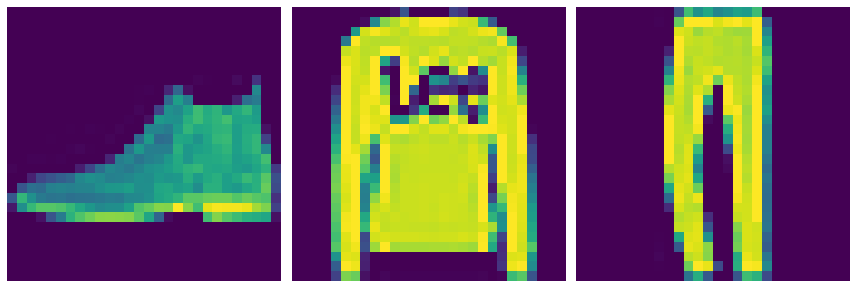

In [52]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
ax1.imshow(X_test[0])
ax1.axis('off')
ax2.imshow(X_test[1])
ax2.axis('off')
ax3.imshow(X_test[2])
ax3.axis('off')
plt.tight_layout()
plt.show()